В данном отчете используется статистика пассажирских перевозок в США за 2015 год. Далее проведена работа по поиску проблемных участков и основных причин задержек рейсов.



Импортируем базу данных и проведем некоторые манипуляции для удобства работы.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

In [3]:
airports = pd.read_csv('C:/Users/Владимир/Desktop/data/airports.csv')

In [4]:
df = pd.read_csv('C:/Users/Владимир/Desktop/data/flights.csv',  dtype=str)

In [5]:
airlines = pd.read_csv('C:/Users/Владимир/Desktop/data/airlines.csv')

In [6]:
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]

In [7]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df = df.drop(columns=['YEAR', 'MONTH', 'DAY'])

In [8]:
cols = df.columns.to_list()
df = df[cols[-1:] + cols[:-1]]

In [9]:
df.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01,4,AS,98,N407AS,ANC,SEA,0005,2354,-11,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,4,US,840,N171US,SFO,CLT,0020,0018,-2,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,4,AS,135,N527AS,SEA,ANC,0025,0024,-1,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


1.ГОД, МЕСЯЦ, ДЕНЬ, ДЕНЬ НЕДЕЛИ,
2.AIRLINE - АВИАЛИНИИ,
3.FLIGHT_NUMBER - НОМЕР ПОЛЕТА,
4.TAIL_NUMBER - ИДЕНТИФИКАТОР САМОЛЕТА,
5.ORIGIN_AIRPORT - АЭРОПОРТ(ОТКУДА),
6.DESTINATION_AIRPORT - АЭРОПОРТ(КУДА),
7.SCHEDULED_DEPARTURE - ЗАПЛАНИРОВАННОЕ ВРЕМЯ ОТПРАВЛЕНИЯ
8.DEPARTURE_DELAY - ОБЩАЯ ЗАДЕРЖКА ОТПРАВЛЕНИЯ(!!!!!!!!)
9.DEPARTURE_TIME - WHEEL_OFF - TAXI_OUT,(ВРЕМЯ ОТПРАВЛЕНИЯ)
10.TAXI_OUT - ВРЕМЯ МЕЖДУ ОТПРАВЛЕНИЕМ ОТ ВЫХОДА НА ПОСАДКУ в АЭРОПОРТУ И ВЗЛЕТом,
11.WHEELS_OFF - КОНКРЕТНОЕ ВРЕМЯ ОТРЫВА КОЛЕС(ПЕРВЫЕ ДВЕ ЦИФРЫ ЧАСЫ, МИНУТЫ)
12.SCHEDULED_TIME - Запланированное количество времени, необходимое для полета
13.ELAPSED_TIME - AIR_TIME+TAXI_IN+TAXI_OUT (пройденное время)
14.AIR_TIME - длительность полета от взлета до посадки
15.DISTANCE - дистанция между аэропортами
16.WHEELS_ON - момент времени приземления
17.TAXI_IN - Время, прошедшее между посадкой и высадкой
18.SCHEDULED_ARRIVAL - Планируемое время прибытия
19.ARRIVAL_TIME - WHEELS_ON+TAXI_IN(время прибытия)
20.ARRIVAL_DELAY - ARRIVAL_TIME-SCHEDULED_ARRIVAL(задержка прибытия)
21.DIVERTED - ПРИЗЕМЛИЛСЯ НЕ ПО РАСПИСАНИЮ
22.CANCELLED - отмененные рейсы
23.CANCELLATION_REASON - причина отмены

Рассмотрим общий процент рейсов с задержками

In [10]:
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) & (df.DESTINATION_AIRPORT.apply(len) == 3)]

In [11]:
percentage_without_delay = df[["AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].isnull().sum()/df.shape[0]*100

print("Percentage of flights dispatched on time = ", percentage_without_delay[2] )

Percentage of flights dispatched on time =  80.86276257054205


Далее рассмотрим как устроен рынок авиаперевозок. Какой процент перевозок совершает каждая авиакомпания и какой процент задержек она создает.

In [ ]:
Number_of_flights = sum(df.groupby('AIRLINE').size())

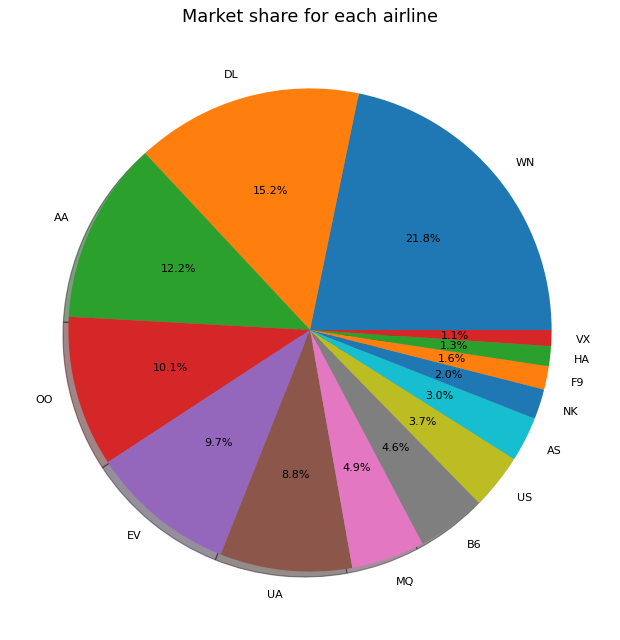

In [13]:
fig = plt.figure(figsize = (16,10), dpi=80)
fig.patch.set_facecolor('xkcd:white')


plt.title('Market share for each airline', fontsize=16)
plt.pie(100*df.groupby('AIRLINE').size().sort_values()[::-1]/Number_of_flights, labels=df.groupby('AIRLINE').size().sort_values()[::-1].index, autopct='%1.1f%%',  shadow=True)
plt.show()

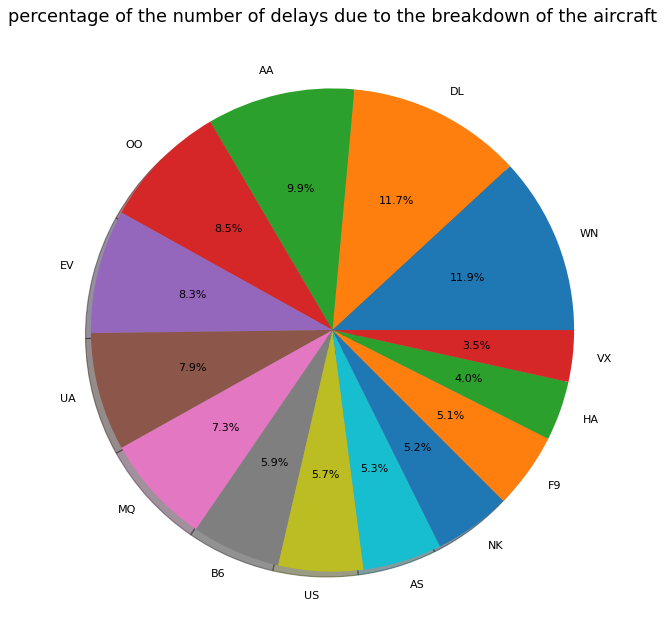

In [14]:
Number_of_flights_delays = sum(df.groupby('AIRLINE')['AIRLINE_DELAY'].size())

fig = plt.figure(figsize = (16,10), dpi=80)
fig.patch.set_facecolor('xkcd:white')

plt.title('percentage of the number of delays due to the breakdown of the aircraft', fontsize=16)
plt.pie(100*df.groupby('AIRLINE')['AIRLINE_DELAY'].nunique().sort_values()[::-1]/Number_of_flights_delays, labels=df.groupby('AIRLINE')['AIRLINE_DELAY'].size().sort_values()[::-1].index, autopct='%1.1f%%',  shadow=True)
plt.show()

Из круговых диаграмм видно, что крупные перевозчики составляют больший процент задержек, что являетсяя достаточно естественным, при этом из диаграмм видно, что компания WN совершает перелетов на 6% больше компания DL, при этом процент задережек создаваемый этими компаниями отличается всего на 0,6%. Этот факт свидетельствует, что парк самолетов у компании DL менее надежен, с учетом части рынка, занимаемого этой компании, стоит провести дополнительные проверки технического состояния самолетов компании DL.

Рассмотрим статистику задержек в зависимости от времени года. 

Text(0, 0.5, 'Number of delays')

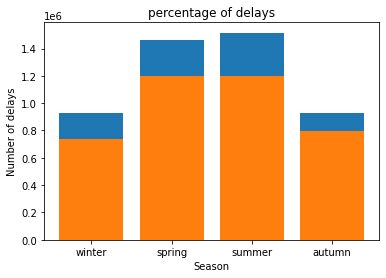

In [113]:
winter_len = len(df.loc[("2015-12-01" <= df['DATE']) | (df['DATE'] <= "2015-01-31")])
spring_len = len(df.loc[("2015-03-01" <= df['DATE']) & (df['DATE'] <= "2015-05-31")])
summer_len = len(df.loc[("2015-06-01" <= df['DATE']) & (df['DATE'] <= "2015-08-31")])
autumn_len = len(df.loc[("2015-09-01" <= df['DATE']) & (df['DATE'] <= "2015-11-30")])

winter_delay = df.loc[("2015-12-01" <= df['DATE']) | (df['DATE'] <= "2015-01-31")][["WEATHER_DELAY"]].isna().any(axis=1).sum()
spring_delay = df.loc[("2015-03-01" <= df['DATE']) & (df['DATE'] <= "2015-05-31")][["WEATHER_DELAY"]].isna().any(axis=1).sum()
summer_delay = df.loc[("2015-06-01" <= df['DATE']) & (df['DATE'] <= "2015-08-31")][["WEATHER_DELAY"]].isna().any(axis=1).sum()
autumn_delay = df.loc[("2015-09-01" <= df['DATE']) & (df['DATE'] <= "2015-11-30")][["WEATHER_DELAY"]].isna().any(axis=1).sum()


_, ax = plt.subplots()
ax.bar(["winter" , "spring", "summer",  "autumn"], [winter_len, spring_len, summer_len, autumn_len])
ax.set_title("Number of flights by season")
ax.set_xlabel("Season")
ax.set_ylabel("Number of flights")

ax.bar(["winter" , "spring", "summer",  "autumn"], [winter_delay, spring_delay, summer_delay, autumn_delay])
ax.set_title("percentage of delays")
ax.set_xlabel("Season")
ax.set_ylabel("Number of delays")



Диаграмма свидетельствует о том, что процент задержек из-за погоды осенью самый высокий. Ввиду этого в это время года стоит проводить более тщательный метеопрогноз в предверии рейсов.

Рассмотрим какие рейсы самые загруженные и на каких рейсах происходит самое частое число задержек.


Самые загруженные рейсы

In [97]:
df['ROUTE'] = df['ORIGIN_AIRPORT']  + "->" +  df['DESTINATION_AIRPORT']
df.groupby('ROUTE').size().sort_values()[:-11:-1]

ROUTE
SFO->LAX    13406
LAX->SFO    13114
JFK->LAX    11875
LAX->JFK    11868
LAS->LAX     9651
LAX->LAS     9526
LGA->ORD     9200
ORD->LGA     9130
JFK->SFO     8323
SFO->JFK     8322
dtype: int64

Рейсы с самымми частыми задержками

In [100]:
df.groupby('ROUTE')['AIRLINE_DELAY'].nunique().sort_values()[:-11:-1]

ROUTE
ORD->DFW    172
JFK->LAX    170
LAX->SFO    166
ORD->SFO    160
LAX->HNL    156
ORD->LAX    155
SFO->LAX    155
DFW->ATL    153
LGA->ATL    152
BWI->ATL    150
Name: AIRLINE_DELAY, dtype: int64

Наконец рассмотрим статистику по задержкам из аэропортов. Данные по задержкам из-за проблем с безопасностью свидетельствуют об отсутствии должных систем безопасности. 

В первой диаграмме представленны первые 10 самых загруженных аэропортовб во второй диаграмме предствелены 10 аэропортов с самыми частыми задержками. Следующие аэропорты: DFW PHX LAX ORD IAH встречаются в обоих списках. 

Text(0, 0.5, 'Flights per year')

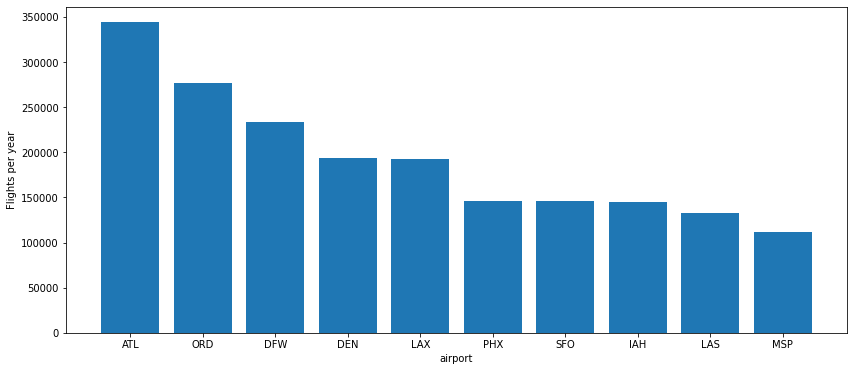

In [110]:
_AIRPORT = df.groupby('ORIGIN_AIRPORT').size().sort_values()[:-11:-1]

_, ax = plt.subplots(figsize=(14,6))

ax.bar(_AIRPORT.index, _AIRPORT)
ax.set_xlabel("airport")
ax.set_ylabel("Flights per year")

Text(0, 0.5, 'number of delays')

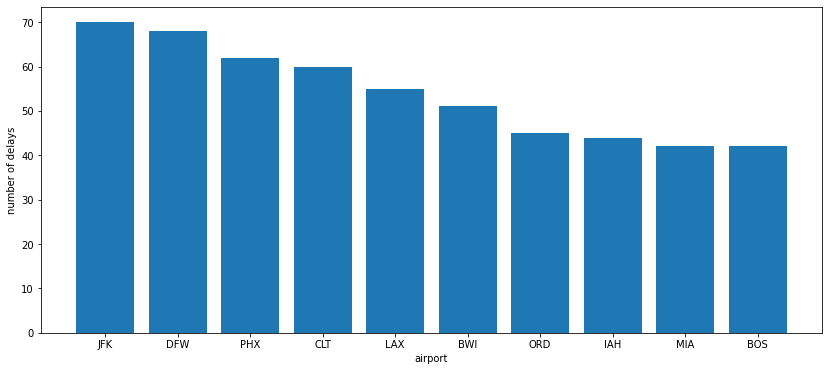

In [114]:
_AIRPORT_DELAY = df.groupby('ORIGIN_AIRPORT')['SECURITY_DELAY'].nunique().sort_values()[:-11:-1]

_, ax = plt.subplots(figsize=(14,6))

ax.bar(_AIRPORT_DELAY.index, _AIRPORT_DELAY)
ax.set_xlabel("airport")
ax.set_ylabel("number of delays")